# Analysis and visualization of scraped github data


## Import the necessary libraries 

In [248]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import bokeh 
from math import pi
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
from bokeh.io import output_notebook
import calendar
from bokeh.models import NumeralTickFormatter
from bokeh.palettes import Category10
from bokeh.palettes import Category20c
from bokeh.models import HoverTool
from scipy.stats import linregress
from bokeh.palettes import Category20
import pandas as pd
from math import pi
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from itertools import cycle
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from bokeh.palettes import Category20
from bokeh.models import HoverTool
from bokeh.palettes import Category20


### Load the DataFrame

In [260]:
df = pd.read_csv('FFFFData.csv')

In [261]:
df.head()

Unnamed: 0  0  0.1         id  \
0           0  1    1  164140756   
1           1  2    2  168008797   
2           2  3    3  164574693   
3           3  4    4  164608222   
4           4  6    6  165041732   

                                                 url  \
0  https://api.github.com/repos/files-community/F...   
1  https://api.github.com/repos/microsoft/calculator   
2  https://api.github.com/repos/qishibo/AnotherRe...   
3    https://api.github.com/repos/alibaba/flutter-go   
4      https://api.github.com/repos/go-kratos/kratos   

                         name            owner     ownertype  created_at  \
0                       Files  files-community  Organization  2019-01-04   
1                  calculator        microsoft  Organization  2019-01-28   
2  AnotherRedisDesktopManager          qishibo          User  2019-01-08   
3                  flutter-go          alibaba  Organization  2019-01-08   
4                      kratos        go-kratos  Organization  2019-01-10   

   updated_at  ...                                        description  \
0  2023-07-06  ...  Building the best file manager experience for ...   
1  2023-07-06  ...  Windows Calculator: A simple yet powerful calc...   
2  2023-07-06  ...  A faster, better and more stable redis desktop...   
3  2023-07-06  ...  flutter 开发者帮助 APP，包含 flutter 常用 140+ 组件的demo 演...   
4  2023-07-06  ...  Your ultimate Go microservices framework for t...   

                                         archive_url  forks  \
0  https://api.github.com/repos/files-community/F...   1841   
1  https://api.github.com/repos/microsoft/calcula...   4956   
2  https://api.github.com/repos/qishibo/AnotherRe...   2359   
3  https://api.github.com/repos/alibaba/flutter-g...   3798   
4  https://api.github.com/repos/go-kratos/kratos/...   3839   

                                              topics      license  \
0  ['alternatives', 'csharp', 'customization', 'd...  MIT License   
1  ['cpp', 'csharp', 'uwp', 'windows', 'windows-1...  MIT License   
2  ['redis-client', 'redis-cluster', 'redis-deskt...  MIT License   
3  ['dart', 'flutter', 'flutter-demo', 'flutter-d...        Other   
4  ['architecture', 'cloud-native', 'framework', ...  MIT License   

  allow_forking                                   contributers_url  \
0          True  https://api.github.com/repos/files-community/F...   
1          True  https://api.github.com/repos/microsoft/calcula...   
2          True  https://api.github.com/repos/qishibo/AnotherRe...   
3          True  https://api.github.com/repos/alibaba/flutter-g...   
4          True  https://api.github.com/repos/go-kratos/kratos/...   

                                       languages_url  \
0  https://api.github.com/repos/files-community/F...   
1  https://api.github.com/repos/microsoft/calcula...   
2  https://api.github.com/repos/qishibo/AnotherRe...   
3  https://api.github.com/repos/alibaba/flutter-g...   
4  https://api.github.com/repos/go-kratos/kratos/...   

                                      used_languages  \
0     {'C#': ' 97.87', 'C++': ' 2.05', 'C': ' 0.08'}   
1  {'C++': ' 72.62', 'C#': ' 25.64', 'C': ' 1.40'...   
2  {'JavaScript': ' 92.62', 'SCSS': ' 7.18', 'HTM...   
3  {'Dart': ' 99.11', 'JavaScript': ' 0.22', 'Rub...   
4  {'Go': ' 98.73', 'Shell': ' 0.51', 'Makefile':...   

                                    top_contributors  
0  [{'name': 'yaira2', 'type': 'User', 'contribut...  
1  [{'name': 'mcooley', 'type': 'User', 'contribu...  
2  [{'name': 'qishibo', 'type': 'User', 'contribu...  
3  [{'name': 'hanxu317317', 'type': 'User', 'cont...  
4  [{'name': 'tonybase', 'type': 'User', 'contrib...  

[5 rows x 25 columns]

In [262]:
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("0", axis=1)
df = df.drop("0.1", axis=1)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3261 non-null   int64 
 1   url                3261 non-null   object
 2   name               3261 non-null   object
 3   owner              3261 non-null   object
 4   ownertype          3261 non-null   object
 5   created_at         3261 non-null   object
 6   updated_at         3261 non-null   object
 7   pushed_at          3261 non-null   object
 8   language           3261 non-null   object
 9   has_issues         3261 non-null   bool  
 10  stargazers_count   3261 non-null   int64 
 11  open_issues_count  3261 non-null   int64 
 12  description        3261 non-null   object
 13  archive_url        3261 non-null   object
 14  forks              3261 non-null   int64 
 15  topics             3261 non-null   object
 16  license            3261 non-null   object


## Get The Data Frame Information 

In [264]:
df.describe()

id  stargazers_count  open_issues_count         forks
count  3.261000e+03       3261.000000        3261.000000   3261.000000
mean   1.810105e+08       1863.263723          56.107022    295.076357
std    1.055853e+07       4108.737332         187.124696   1210.727534
min    1.637212e+08        310.000000           0.000000      2.000000
25%    1.713682e+08        505.000000           6.000000     63.000000
50%    1.811050e+08        774.000000          19.000000    122.000000
75%    1.901604e+08       1614.000000          51.000000    253.000000
max    2.007339e+08      92753.000000        5417.000000  60591.000000

In [265]:
def analyze_dataframe(df):
    statistics = pd.DataFrame()

    # Column Data Types
    statistics['Column Data Types'] = df.dtypes

    # Column Valid Values Percentage
    total_rows = len(df)
    statistics['Column Valid Values'] = (df.count() / total_rows) * 100

    # Column Null Values Percentage
    statistics['Column Null Values'] = (df.isnull().sum() / total_rows) * 100

    return statistics

analyze_dataframe(df)

Column Data Types  Column Valid Values  Column Null Values
id                            int64                100.0                 0.0
url                          object                100.0                 0.0
name                         object                100.0                 0.0
owner                        object                100.0                 0.0
ownertype                    object                100.0                 0.0
created_at                   object                100.0                 0.0
updated_at                   object                100.0                 0.0
pushed_at                    object                100.0                 0.0
language                     object                100.0                 0.0
has_issues                     bool                100.0                 0.0
stargazers_count              int64                100.0                 0.0
open_issues_count             int64                100.0                 0.0
description                  object                100.0                 0.0
archive_url                  object                100.0                 0.0
forks                         int64                100.0                 0.0
topics                       object                100.0                 0.0
license                      object                100.0                 0.0
allow_forking                  bool                100.0                 0.0
contributers_url             object                100.0                 0.0
languages_url                object                100.0                 0.0
used_languages               object                100.0                 0.0
top_contributors             object                100.0                 0.0

## Analysis Phase 

### Number of Repositories per Language

In [266]:
output_notebook()

counts = df['language'].value_counts().head(25)  # Get the top 15 languages

source = ColumnDataSource(data=dict(language=counts.index.tolist(), count=counts.tolist()))

hover = HoverTool(tooltips=[("Language", "@language"), ("Count", "@count")])  # Add tooltips for language and count

p = figure(x_range=counts.index.tolist(), plot_height=400, plot_width=1100, title='Number of Repositories per Language',
           tools=[hover])  # Add the hover tool to the figure

p.vbar(x='language', top='count', source=source, width=0.9, line_color='white',
       fill_color=factor_cmap('language', palette=Category20[20], factors=counts.index.tolist()))

p.xaxis.axis_label = 'Language'
p.yaxis.axis_label = 'Number of Repositories'

p.xaxis.major_label_orientation = 0.8

show(p)


Loading BokehJS ...

### The Average Open Issues By Language

In [267]:
output_notebook()

avg_open_issues = df.groupby('language')['open_issues_count'].mean()
avg_open_issues = avg_open_issues.sort_values(ascending=False).head(20)  # Get the top 20 languages

source = ColumnDataSource(data=dict(language=avg_open_issues.index.tolist(), avg_open_issues=avg_open_issues.values))

hover = HoverTool(tooltips=[("Language", "@language"), ("Average Open Issues", "@avg_open_issues")])  # Add tooltips for language and average open issues

p = figure(x_range=avg_open_issues.index.tolist(), plot_height=500, plot_width=1100,
           title='Average Open Issues By Language', toolbar_location=None, tools=[hover])

p.vbar(x='language', top='avg_open_issues', source=source, width=0.8, color='navy')

p.xaxis.axis_label = 'Programming Language'
p.yaxis.axis_label = 'Average Open Issues Count'
p.title.text_font_size = '16pt'
p.title.align = 'center'
p.xaxis.major_label_text_font_size = '10pt'
p.yaxis.major_label_text_font_size = '10pt'
p.yaxis.formatter = NumeralTickFormatter(format='0')
p.xaxis.major_label_orientation = 45
p.background_fill_color = 'whitesmoke'
p.border_fill_color = 'whitesmoke'
p.min_border_left = 80
p.min_border_right = 50
p.min_border_top = 50
p.min_border_bottom = 50

show(p)


Loading BokehJS ...

### Percentage Of Repositories That Have Issues vs. Those That Don't :

In [268]:
source = ColumnDataSource(df)

# Get the number of repositories with and without issues :

has_issues = df['has_issues'].value_counts()

p = figure(plot_height = 500, plot_width = 500, title='Percentage of Repositories with Issues')

p.wedge(x=0, y=1, radius = 0.8, start_angle=0, end_angle=has_issues[True]/len(df)*2*3.14,
        color=Category10[3][0], legend_label= 'Has Issues' , source=source)
p.wedge(x=0, y=1, radius=0.8, start_angle=has_issues[True]/len(df)*2*3.14, end_angle=2*3.14,
        color=Category10[3][1], legend_label= 'No Issues' , source=source)

p.legend.location = "bottom_right"

show(p)

## The 10 Most Used Languages 

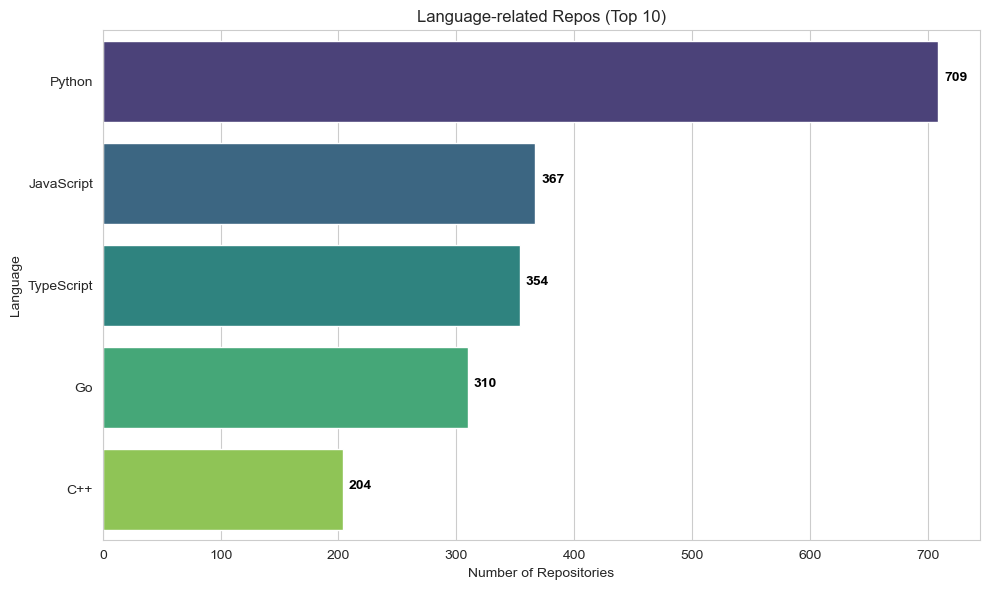

In [269]:
language = df['language'].value_counts()
top_language = language.head(5)

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = top_language, y = top_language.index, palette='viridis')

# Add labels for the number of repositories :

for i, v in enumerate(top_language):
    ax.text(v + 5, i, str(v), color='black', fontweight='bold')

plt.xlabel('Number of Repositories')
plt.ylabel('Language')
plt.title('Language-related Repos (Top 10)')

plt.tight_layout()

plt.show()

## The 10 Famous Repo  

In [270]:
famous_repos = df.nlargest(20, 'stargazers_count') 

source = ColumnDataSource(famous_repos)

# Define the hover tooltip
hover = HoverTool(tooltips=[('Repository', '@name'), ('Stargazers', '@stargazers_count')])

p = figure(x_range=famous_repos['name'], plot_height=500, plot_width=1100, title='Top 10 Famous Repositories',
           tools=[hover])

p.vbar(x='name', top='stargazers_count', width=0.8, source=source,
       line_color='black', fill_color='navy', alpha=0.8)

p.xaxis.major_label_orientation = 45
p.title.text_font_size = '16pt'
p.title.align = 'center'
p.xaxis.axis_label = 'Repository'
p.xaxis.axis_label_text_font_size = '12pt'
p.xaxis.major_label_text_font_size = '10pt'
p.yaxis.axis_label = 'Stargazers'
p.yaxis.axis_label_text_font_size = '12pt'
p.yaxis.major_label_text_font_size = '10pt'
p.xaxis.axis_line_color = 'black'
p.yaxis.axis_line_color = 'black'
p.xgrid.grid_line_color = 'lightgray'
p.ygrid.grid_line_color = 'lightgray'
p.background_fill_color = 'whitesmoke'
p.border_fill_color = 'whitesmoke'
p.min_border_left = 80
p.min_border_right = 80
p.min_border_top = 50
p.min_border_bottom = 50

output_notebook()
show(p)


Loading BokehJS ...

### The Owner Type Percentages

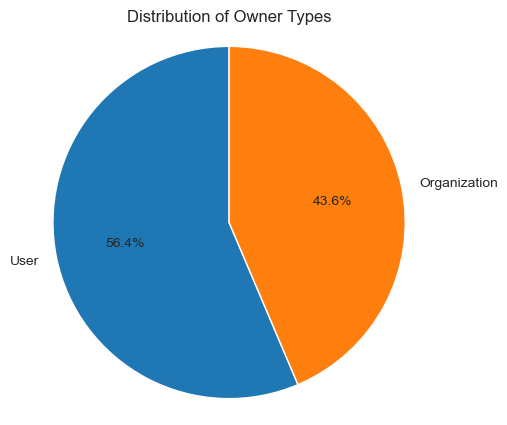

In [271]:
# Count the number of repositories for each owner type :

owner_counts = df['ownertype'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Owner Types')
plt.axis('equal') 
plt.show()


### Percentage of Repositories by License Type

In [272]:
grouped = df['license'].value_counts()

data = pd.DataFrame({'license': grouped.index, 'count': grouped.values})
data['percentage'] = data['count'] / data['count'].sum() * 100

palette_size = len(grouped)
colors = cycle(Category20[20])
data['color'] = [next(colors) for _ in range(palette_size)]

p = figure(plot_height=600, plot_width=1200, title='Percentage of Repositories by License Type', toolbar_location=None,
           tools="hover", tooltips="@license: @count repositories (@percentage%)")

angles = data['percentage'] / 100 * 2 * pi
angles = angles.cumsum()
data['start_angle'] = [0] + list(angles[:-1])
data['end_angle'] = list(angles)

p.wedge(x=0, y=0, radius=0.4, start_angle='start_angle', end_angle='end_angle',
        line_color='white', fill_color='color', legend_field='license', source=data)

p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.legend.label_text_font_size = '8pt'

p.xgrid.visible = False
p.ygrid.visible = False

output_notebook()
show(p)


Loading BokehJS ...

### Distribution of Stargazers Count by Programming Language

In [273]:
output_notebook()

language_stargazers = df[['language', 'stargazers_count']]
languages = language_stargazers['language'].unique()

# Initialize empty lists for quartiles and median
lower_quartiles = []
upper_quartiles = []
medians = []

# Calculate quartiles and median for each programming language:
for language in languages:
    language_data = language_stargazers[language_stargazers['language'] == language]['stargazers_count']
    lower_quartiles.append(np.percentile(language_data, 25))
    upper_quartiles.append(np.percentile(language_data, 75))
    medians.append(np.median(language_data))

source = ColumnDataSource(data=dict(languages=languages,
                                    lower_quartiles=lower_quartiles,
                                    upper_quartiles=upper_quartiles,
                                    medians=medians))

p = figure(title="Distribution of Stargazers Count by Programming Language",
           x_axis_label="Programming Language",
           y_axis_label="Stargazers Count",
           x_range=languages,
           plot_width=1100, plot_height=400)

# Plot the box plot
p.vbar(x='languages', top='upper_quartiles', bottom='lower_quartiles',
       width=0.8, source=source, line_color="black", fill_color="lightblue", legend_label="Quartiles")

# Plot the median line
p.segment(x0='languages', y0='medians', x1='languages', y1='medians',
          line_color="black", line_width=2, source=source, legend_label="Median")

p.xaxis.major_label_orientation = 45
p.legend.location = "top_right"

# Show the plot
show(p)


Loading BokehJS ...

### The Count Of Famous Repositories Per Top Used Languages

In [274]:
output_notebook()

famous_repos = df.nlargest(10, 'stargazers_count')

top_languages = famous_repos['language'].value_counts().nlargest(8)

language_data = pd.DataFrame({'Language': top_languages.index, 'Count': top_languages.values})

source = ColumnDataSource(language_data)

p = figure(x_range=language_data['Language'], plot_height=400, plot_width=1000, title='Top Languages - Famous Repositories Count',
           tools="hover", tooltips=[('Language', '@Language'), ('Count', '@Count')])

p.vbar(x='Language', top='Count', width=0.9, source=source, line_color='black', fill_color='skyblue')

p.xaxis.axis_label = 'Language'
p.yaxis.axis_label = 'Count'
p.xaxis.major_label_orientation = 45

p.title.text_font_size = '16pt'
p.title.align = 'center'
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'
p.xaxis.major_label_text_font_size = '10pt'
p.yaxis.major_label_text_font_size = '10pt'
p.y_range.start = 0

p.background_fill_color = 'whitesmoke'
p.border_fill_color = 'whitesmoke'
p.min_border_left = 80
p.min_border_right = 50
p.min_border_top = 50
p.min_border_bottom = 50

show(p)


Loading BokehJS ...

## Relationship between Stargazers Count and Open Issues Count

In [275]:
output_notebook()

source = ColumnDataSource(df)

# Calculate linear regression line :

slope, intercept, r_value, p_value, std_err = linregress(df['stargazers_count'], df['open_issues_count'])
x = [df['stargazers_count'].min(), df['stargazers_count'].max()]
y = [slope * xi + intercept for xi in x]

p = figure(plot_height=400, plot_width=600, title='Relationship between Stargazers Count and Open Issues Count')

# Add the scatter plot and linear regression line :

p.scatter(x='stargazers_count', y='open_issues_count', source=source, size=8, color='blue')
p.line(x, y, line_width=2, color='red')

p.xaxis.axis_label = 'Stargazers Count'
p.yaxis.axis_label = 'Open Issues Count'

# Add title
p.title.text += ' (Correlation Coefficient: {:.2f})'.format(r_value)

show(p)

Loading BokehJS ...

In [276]:
# Convert the datetime columns to the desired format (YYYY-MM-DD)

df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df['updated_at'] = pd.to_datetime(df['updated_at']).dt.date
df['pushed_at'] = pd.to_datetime(df['pushed_at']).dt.date

### Number of Repositories Created Over Time 

In [285]:
output_notebook()

repos_created = df['created_at'].dt.date.value_counts().sort_index()

p = figure(title="Number of Repositories Created Over Time",
           x_axis_label="Date",
           y_axis_label="Number of Repositories",
           x_axis_type='datetime',
           plot_width=800, plot_height=400)

p.line(repos_created.index, repos_created.values, line_width=2)

p.xaxis.formatter = DatetimeTickFormatter(days="%m/%d/%Y")

p.xaxis.major_label_orientation = 45

show(p)


Loading BokehJS ...

### Number of Repositories Created per Month

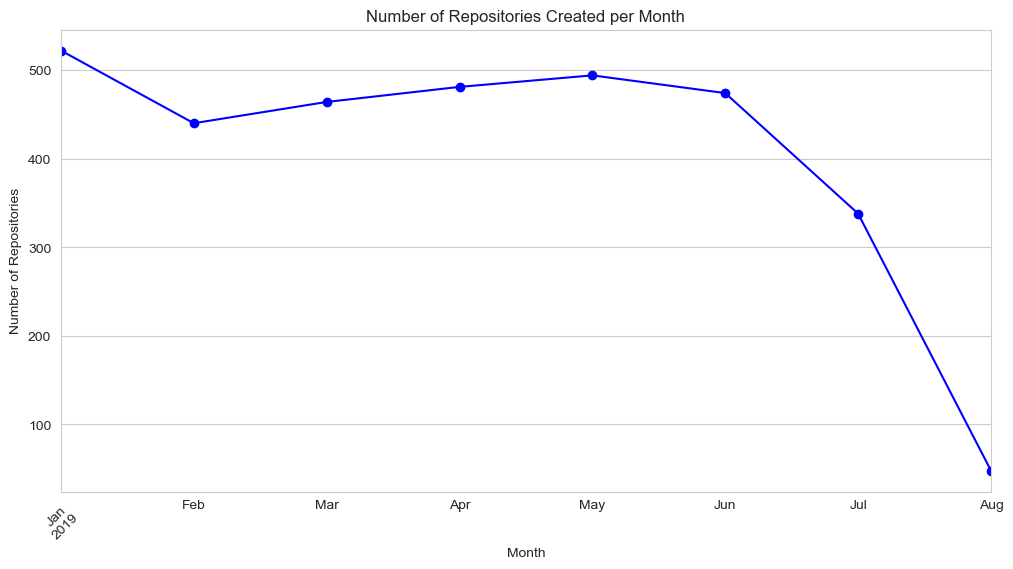

In [278]:
repos_per_month = df.groupby(df['created_at'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
repos_per_month.plot(kind='line', marker='o', color='b')

plt.title('Number of Repositories Created per Month')
plt.xlabel('Month')
plt.ylabel('Number of Repositories')

plt.xticks(rotation=45)

plt.show()

### Usage of Programming Languages Over Time

In [279]:

output_notebook()

language_counts = df.groupby(['created_at', 'language']).size().unstack().fillna(0)

dates = language_counts.index

p = figure(title="Usage of Programming Languages Over Time",
           x_axis_label="Date",
           y_axis_label="Number of Repositories",
           x_axis_type='datetime',
           plot_width=1200, plot_height=500)

num_languages = len(language_counts.columns)
colors = Category20[num_languages] if num_languages <= len(Category20) else Category20[num_languages % len(Category20)]

# Add multi-line glyphs to the figure
renderers = []
for i, language in enumerate(language_counts.columns[:10]):  # Limit to first 10 languages
    counts = language_counts[language].cumsum().values
    renderer = p.line(dates, counts, line_width=2, legend_label=language, color=colors[i])
    renderers.append(renderer)

tooltips = [
    ("Date", "@x{%F}"),
]
for i, renderer in enumerate(renderers):
    tooltip = ("Count", f"@y{i}")
    tooltips.append(tooltip)

p.add_tools(HoverTool(renderers=renderers, tooltips=tooltips, formatters={"@x": "datetime"}))

p.legend.location = "top_left"
p.legend.label_text_font_size = '10pt'
p.legend.spacing = 5

p.title.text_font_size = '16pt'
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'
p.xaxis.major_label_text_font_size = '10pt'
p.yaxis.major_label_text_font_size = '10pt'

p.background_fill_color = 'whitesmoke'
p.border_fill_color = 'whitesmoke'
p.min_border_left = 80
p.min_border_right = 50
p.min_border_top = 50
p.min_border_bottom = 50

show(p)


Loading BokehJS ...

## Relation Between Projects 

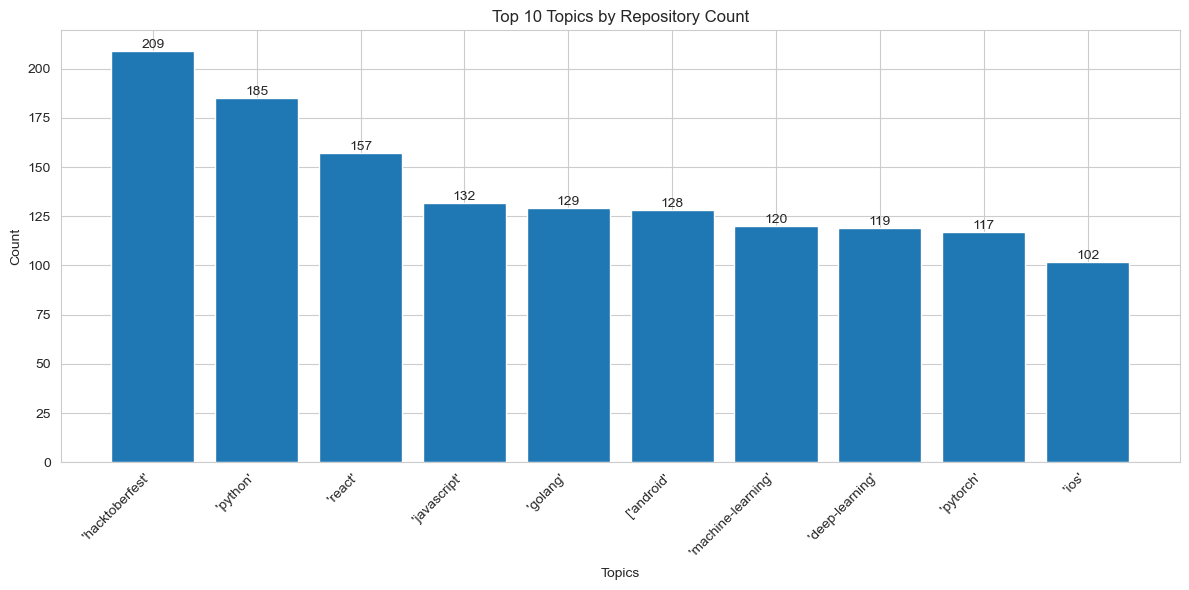

In [284]:
df['topics'] = df['topics'].apply(lambda x: x.split(','))

topics_flat = [topic for sublist in df['topics'] for topic in sublist]

# Calculate the count of each topic
topic_counts = pd.Series(topics_flat).value_counts()

# Select the top N topics
top_n = 10
top_topics = topic_counts.head(top_n)

plt.figure(figsize=(12, 6))

bars = plt.bar(top_topics.index, top_topics.values)

plt.title(f'Top {top_n} Topics by Repository Count')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()


## Relation Between Projects 